In [4]:
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

In [5]:
audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav',
    'archivo_wav4': 'sound4.wav',
    'archivo_wav5': 'sound5.wav'
}

### Reproducimos el audio 

In [6]:
# Load a wave file and play it
wave_obj = sa.WaveObject.from_wave_file(audios['archivo_wav1'])
play_obj = wave_obj.play()
play_obj.wait_done()

### Representamos el wave file en tiempo continuo y discreto

plot the wave sound1.wav


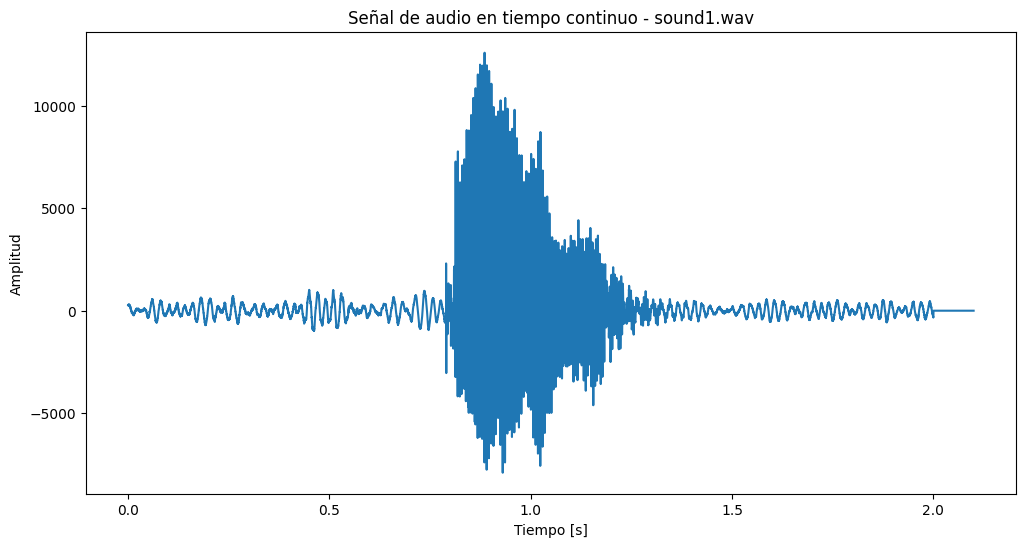

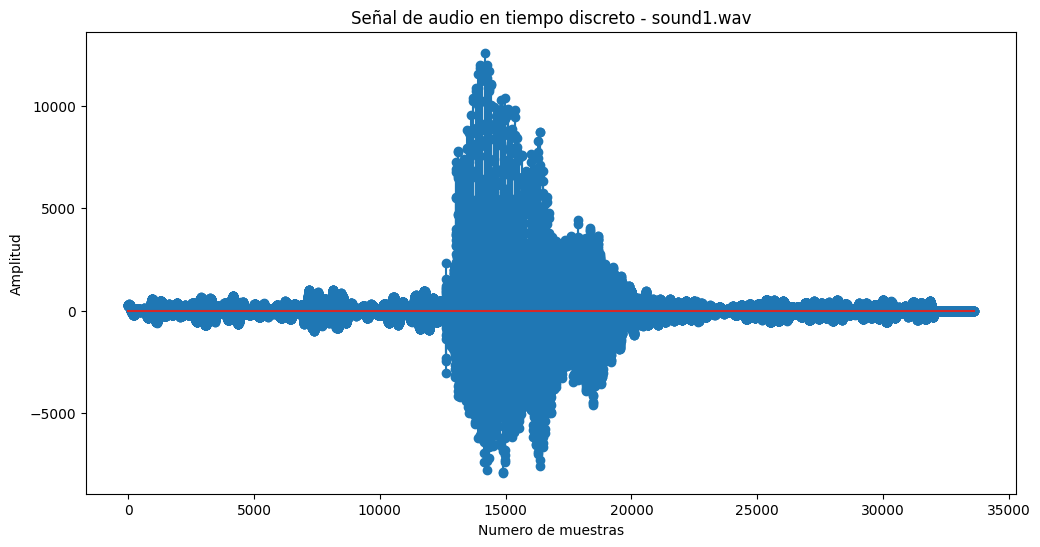

--------------------------------------------------------------------
plot the wave sound2.wav


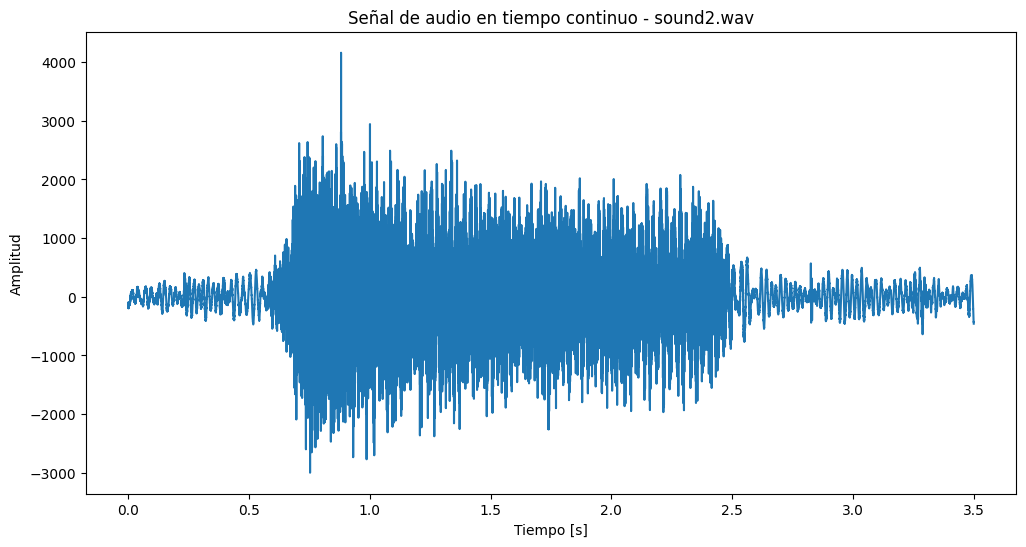

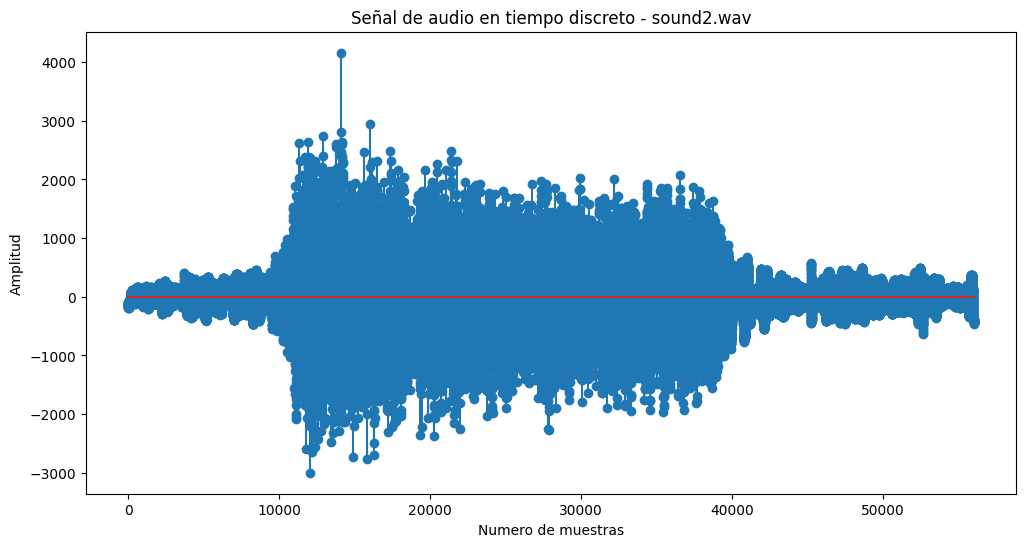

--------------------------------------------------------------------
plot the wave sound3.wav


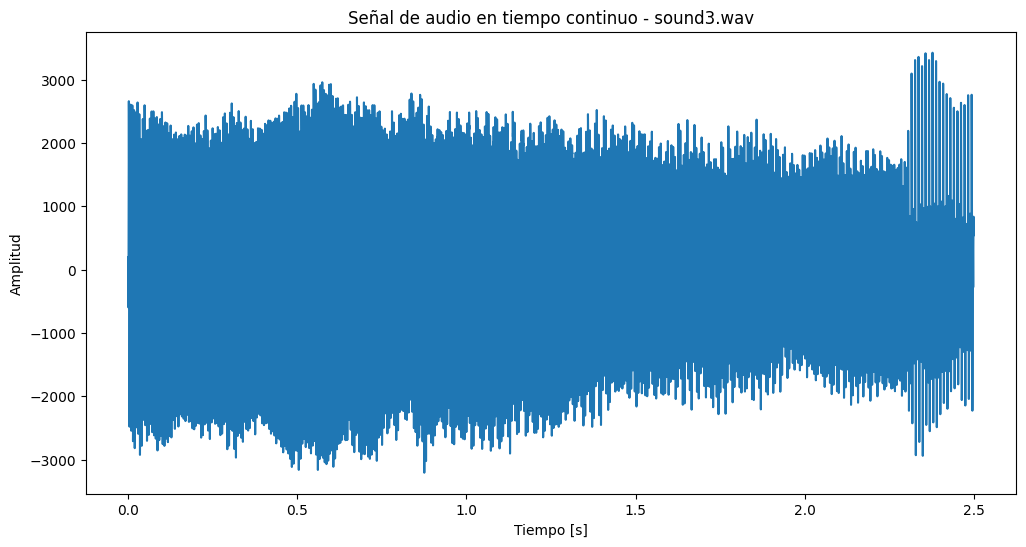

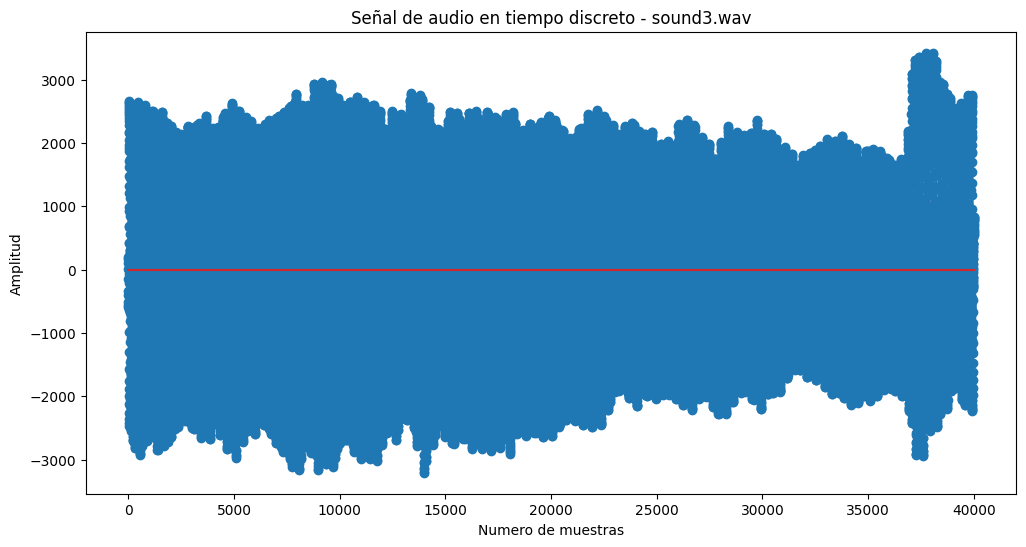

--------------------------------------------------------------------
plot the wave sound4.wav


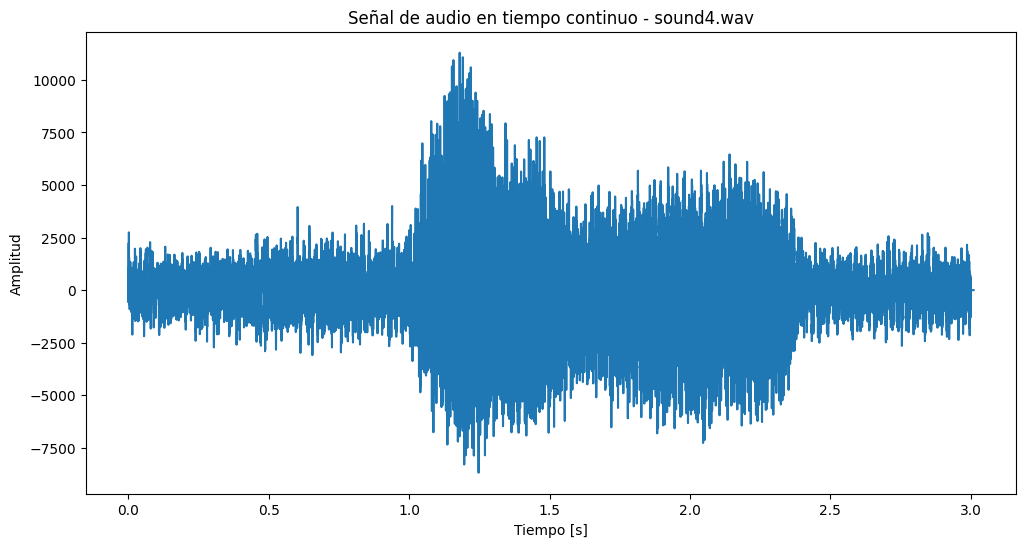

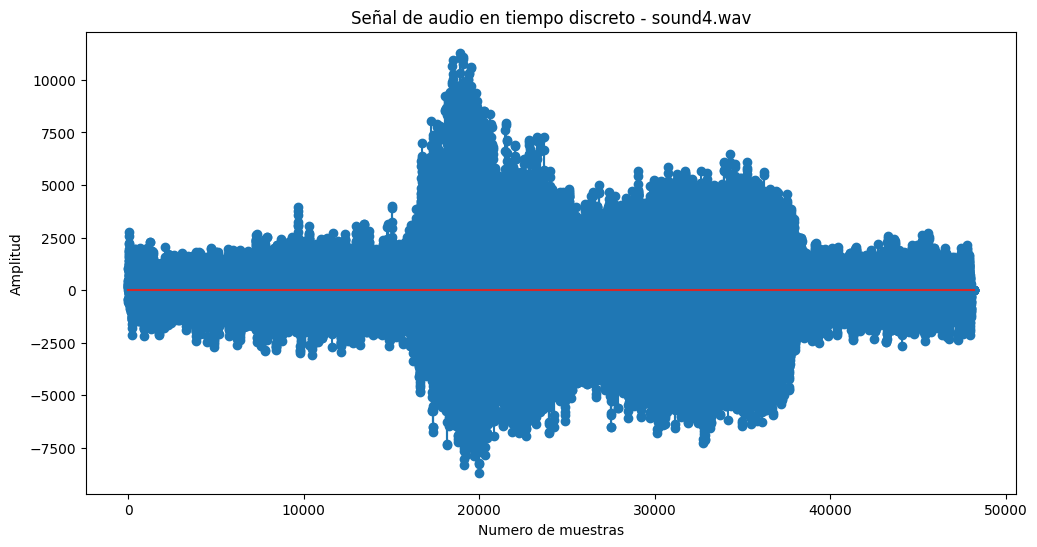

--------------------------------------------------------------------
plot the wave sound5.wav


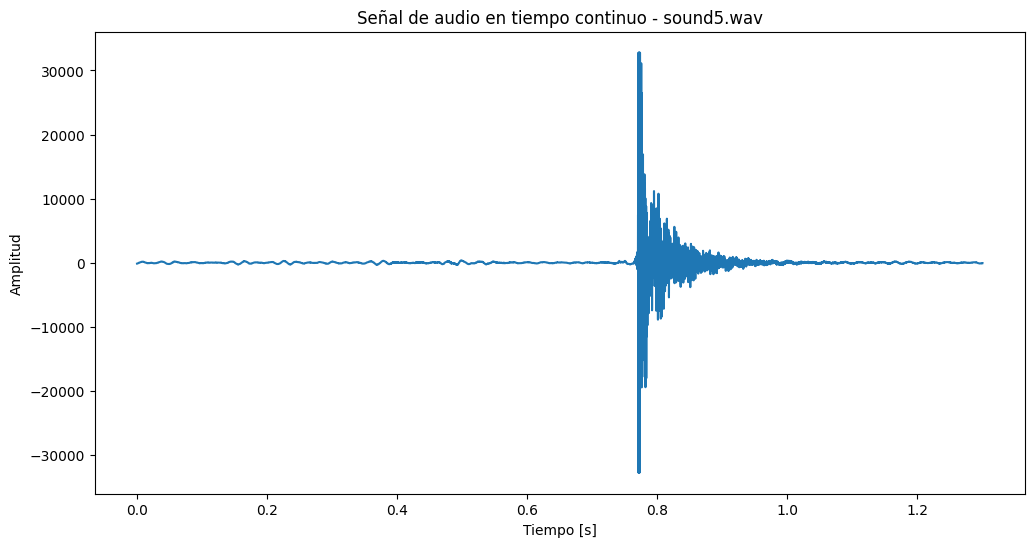

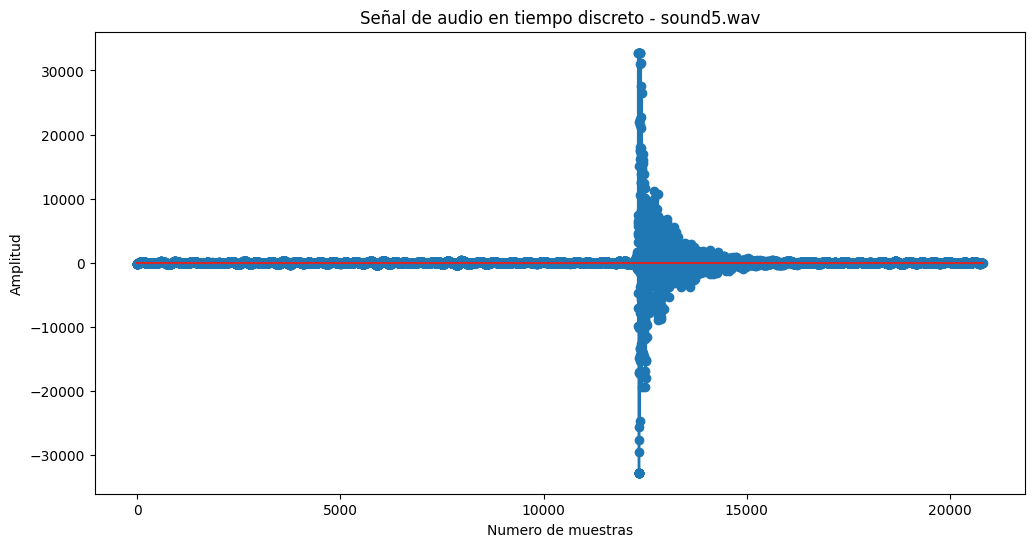

--------------------------------------------------------------------


In [7]:
for archivo_wav in audios.values():
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    numero_muestras = np.arange(0, len(datos)) 
    tiempo_continuo = numero_muestras / frecuencia_muestreo
    
    print(f'plot the wave {archivo_wav}')

    plt.figure(figsize=(12,6))
    plt.plot(tiempo_continuo, datos)
    plt.title('Señal de audio en tiempo continuo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.stem(numero_muestras, datos)
    plt.title('Señal de audio en tiempo discreto - {}'.format(archivo_wav))
    plt.xlabel('Numero de muestras')
    plt.ylabel('Amplitud')
    plt.show()
    
    print("--------------------------------------------------------------------")


### Ejercicio 1.2

Para los sonidos 1,2,3. Crea un vector que contenga un tramo de
100ms de la señal correspondiente en donde aparezca sonido

Plot the frame sound1.wav
 * potencia es: 1722.2044642857143
 * energia es: 57866070.0


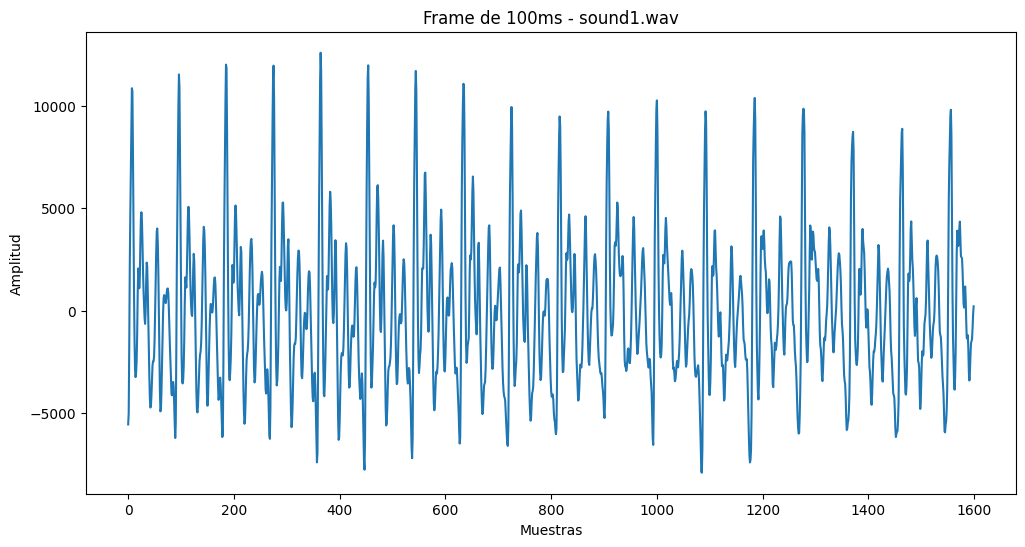

--------------------------------------------------------------------
Plot the frame sound2.wav
 * potencia es: 2696.3524044213495
 * energia es: 150998431.0


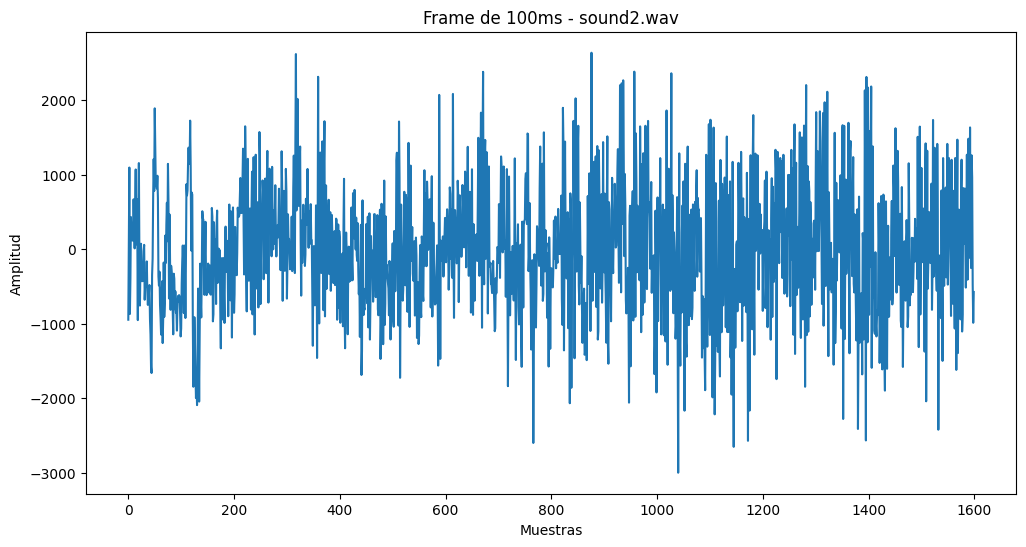

--------------------------------------------------------------------
Plot the frame sound3.wav
 * potencia es: 540.0995475113122
 * energia es: 21604522.0


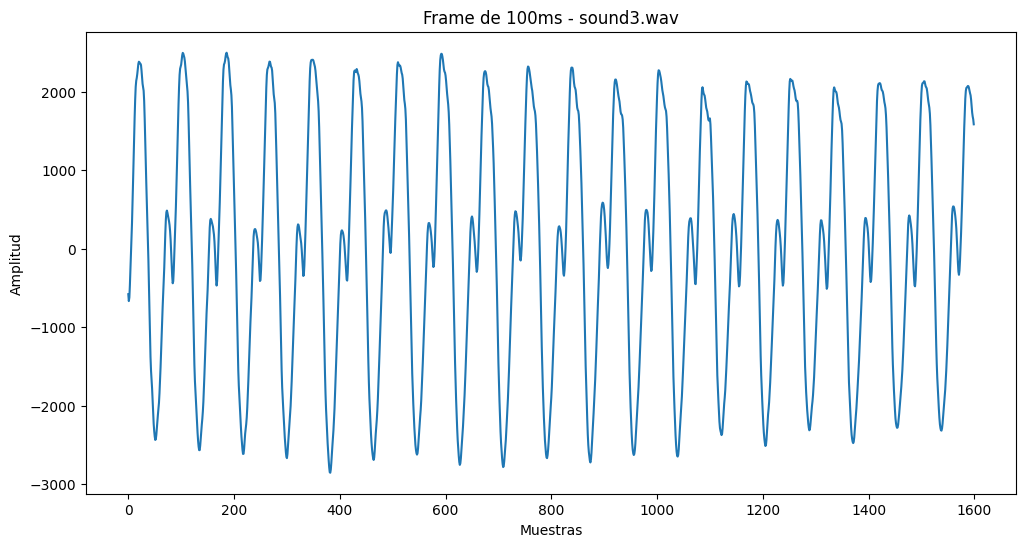

--------------------------------------------------------------------


In [12]:
# List of audio files
tres_audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav'
}

muestras_audios = {
    'sound1.wav': 13800,
    'sound2.wav': 11000,
    'sound3.wav': 1000,
    'sound4.wav': 17500,
    'sound5.wav': 12300
}

for archivo_wav in tres_audios.values():
# Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create a dictionary to store the samples
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + num_samples] # 100ms frame
    
    print(f'Plot the frame {archivo_wav}')
    
    #power
    power = 1/len(datos) * np.sum(np.abs(datos)**2)
    print(f' * potencia es: {power}')
    
    #energy
    energy = np.sum(np.abs(datos)**2)
    print(f' * energia es: {energy}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(frame)
    plt.title('Frame de 100ms - {}'.format(archivo_wav))
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.show()
 
    print("--------------------------------------------------------------------")

Para sacar las frecuencia fundamental hacemos la transformada de fourier de la señal y buscamos el valor maximo de la amplitud. Lo haremos del archivo_wav2 y archivo_wav3 

In [9]:
# List of audio files
audio_files_only_three = [archivo_wav2, archivo_wav3]


for archivo_wav in audio_files_only_three:
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create the frame vector
    frame = datos[:num_samples]
    
    print(f'Plot fourier frame {archivo_wav}')
    
    '''
    Para sacar las frecuencia fundamental hacemos la transformada de fourier de la señal y buscamos el valor maximo de la amplitud
    '''

    #fourier transform
    fourier = np.fft.fft(frame)
    n = len(frame)
    fourier = fourier[0:int(n/2)]
    fourier = fourier / float(n)
    frecuencia = np.fft.fftfreq(n, d=1.0/frecuencia_muestreo)
    frecuencia = frecuencia[0:int(n/2)]
    plt.figure(figsize=(12, 6))
    plt.xlim(0, 500)  # Set the x-axis limits to zoom in
    plt.plot(frecuencia, np.abs(fourier))
    plt.title('Fourier transform of the frame - {}'.format(archivo_wav)) 
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    
    #print the frecuency value when the amplitude is the highest
    max_value = np.max(np.abs(fourier))
    max_index = np.where(np.abs(fourier) == max_value)
    print(f'\n * frecuencia fundamental es: {frecuencia[max_index]}') 
    
    # Period
    period = 1 / frecuencia[max_index]
    print(f' * periodo es: {period}')
    
    #power
    power = 1/len(datos) * np.sum(np.abs(datos)**2)
    print(f' * potencia es: {power}')
    
    #energy
    energy = np.sum(np.abs(datos)**2)
    print(f' * energia es: {energy}')
    
    plt.show()
    
    print("-----------------------------")


NameError: name 'archivo_wav2' is not defined

### Ejercicio 1.3 

In [ ]:
audio_files = [archivo_wav1, archivo_wav2, archivo_wav3, archivo_wav4, archivo_wav5]

for archivo_wav in audio_files:
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    L_frame = int(0.1 * frecuencia_muestreo)
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//L_frame} componentes")

    #haz vector energía que contenga L_frames de datos
    energia = np.zeros(len(datos)//L_frame)

    for i in range(len(datos)//L_frame):
        energia[i] = np.sum(datos[i*L_frame:(i+1)*L_frame]**2)

    # Plot the energy
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo[:len(datos)//L_frame], energia) # tiempo[:len(datos)//L_frame] es para que el tiempo sea del mismo tamaño que la energía
    plt.title('Energía de la señal')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()

### Ejercicio 1.4

In [ ]:
# for archivo_wav in audio_files:
    
#     # Get the sample rate and data
#     frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
#     L_frame = int(0.02 * frecuencia_muestreo) # 20ms
#     overlap = int(L_frame * 0.5)
    
#     print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

#     # Create an array to store the energy values
#     energia = np.zeros(len(datos)//(L_frame-overlap))

#     # Calculate the energy for each frame
#     for i in range(len(datos)//(L_frame-overlap)):
#         start = i * (L_frame - overlap)
#         end = start + L_frame
#         frame = datos[start:end]
#         energia[i] = np.sum(frame**2)

#     # Plot the energy
#     plt.figure(figsize=(12, 6))
#     plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
#     plt.title('Energía de la señal')
#     plt.xlabel('Tiempo [s]')
#     plt.ylabel('Energía')
#     plt.show()

for archivo_wav in audio_files:
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    L_frame = int(0.02 * frecuencia_muestreo) # 20ms
    overlap = int(L_frame * 0.5)
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

    # Create an array to store the energy values
    energia = np.zeros(len(datos)//(L_frame-overlap))

    # Calculate the energy for each frame
    for i in range(len(datos)//(L_frame-overlap)):
        start = i * (L_frame - overlap)
        end = start + L_frame
        frame = datos[start:end]
        energia[i] = np.sum(frame**2)

    # Plot the energy
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
    plt.title('Energía de la señal')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()
